## About Dataset 
#### [Problem Statement:](https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate)
> **Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.**
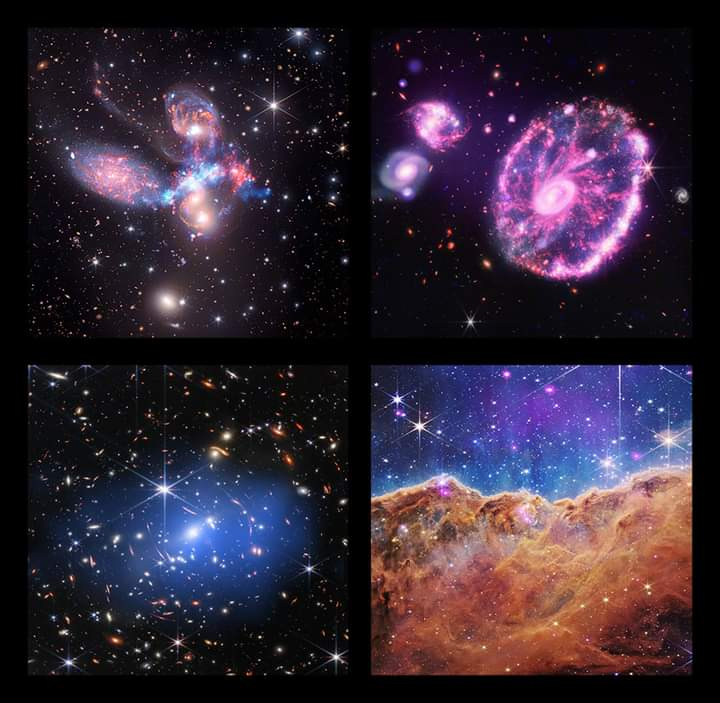
#### Attribute Information:
> Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

### Task
**Given a Pulsar Star’s information, build a machine learning model that can classify the Star.**

* [Importing the libraries](#importing-the-libraries)
* [Reading the data](#Reading-the-data)
* [Exploring the data](#Exploring-the-data)
* [Figure out Data](#Figure-out-Data)
* [Detect Outliers for Every columns](#Detect-Outliers-for-Every-columns)
* [Scaling and Split the data](#Scaling-and-Split-the-data)
* [balance the data](#balance-the-data)
* [Modeling](#Modeling)
* [compersion between models](#compersion-between-models)

## Importing the libraries

In [1]:
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn .metrics import accuracy_score , recall_score , precision_score,f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from random import shuffle
from sklearn.ensemble import  AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
column=['Mean_integrated_profile',
       'std_integrated_profile',
       'Excess_kurtosis_integrated_profile',
       'Skewness_integrated_profile', 'Mean_DM_SNR',
       'std_DM_SNR',
       'Excess_kurtosis_DM_SNR', 'Skewness_DM_SNR',
       'target_class']

In [3]:
path='../input/d/abdelaziznabil/pulsars/HTRU_2.csv'
df=pd.read_csv(path,sep = "," , encoding = "utf-8")

In [4]:
df.columns=column

## Exploring the data

In [5]:
df.head()

Mean_integrated_profile  std_integrated_profile  \
0               102.507812               58.882430   
1               103.015625               39.341649   
2               136.750000               57.178449   
3                88.726562               40.672225   
4                93.570312               46.698114   

   Excess_kurtosis_integrated_profile  Skewness_integrated_profile  \
0                            0.465318                    -0.515088   
1                            0.323328                     1.051164   
2                           -0.068415                    -0.636238   
3                            0.600866                     1.123492   
4                            0.531905                     0.416721   

   Mean_DM_SNR  std_DM_SNR  Excess_kurtosis_DM_SNR  Skewness_DM_SNR  \
0     1.677258   14.860146               10.576487       127.393580   
1     3.121237   21.744669                7.735822        63.171909   
2     3.642977   20.959280                6.896499        53.593661   
3     1.178930   11.468720               14.269573       252.567306   
4     1.636288   14.545074               10.621748       131.394004   

   target_class  
0             0  
1             0  
2             0  
3             0  
4             0

In [6]:
df.describe()

Mean_integrated_profile  std_integrated_profile  \
count             17897.000000            17897.000000   
mean                111.078321               46.549021   
std                  25.652705                6.843040   
min                   5.812500               24.772042   
25%                 100.929688               42.375426   
50%                 115.078125               46.946435   
75%                 127.085938               51.022887   
max                 192.617188               98.778911   

       Excess_kurtosis_integrated_profile  Skewness_integrated_profile  \
count                        17897.000000                 17897.000000   
mean                             0.477897                     1.770417   
std                              1.064056                     6.168058   
min                             -1.876011                    -1.791886   
25%                              0.027108                    -0.188528   
50%                              0.223241                     0.198736   
75%                              0.473349                     0.928206   
max                              8.069522                    68.101622   

        Mean_DM_SNR    std_DM_SNR  Excess_kurtosis_DM_SNR  Skewness_DM_SNR  \
count  17897.000000  17897.000000            17897.000000     17897.000000   
mean      12.614926     26.326918                8.303574       104.859419   
std       29.473637     19.471042                4.506217       106.517270   
min        0.213211      7.370432               -3.139270        -1.976976   
25%        1.923077     14.437330                5.781485        34.957119   
50%        2.801839     18.459977                8.433872        83.068996   
75%        5.464883     28.428152               10.702973       139.310905   
max      223.392141    110.642211               34.539844      1191.000837   

       target_class  
count   17897.00000  
mean        0.09158  
std         0.28844  
min         0.00000  
25%         0.00000  
50%         0.00000  
75%         0.00000  
max         1.00000

**Integrated Profile**

This curve seems to be a normal distribution. which is symmetric about the mean and regular thickness of tails

1. **Mean** : Since mean is close to 50% mark and 25% and 75% are within 1 std. dev. from the mean. Large difference between min and max, hence larger std. dev. Hence the mean of the integrated profile seems volatile with a large standard deviation.

2. **Std. Dev** : Since mean is close to 50% mark and 25% and 75% are within less than 1 std. dev. from the mean, this data is normally distributed. The max and min values are 3-4 standard deviations from the mean.

3. **Excess Kurtosis** : Majority of this data (atleast 75%) is less than mean. Hence a large head portion in this distribution. Hence the distribution of the left of mean is more tightly spread than the right. This means the integrated profile's tails are generally the same size as normal distributions.

4. **Skewness** : Majority of this data (definitely more 75%) is less than mean. Hence a large head portion in this distribution. Hence the distribution of the left of mean is more tightly spread than the right. Hence the integrated profile must not be very skewed.

**DM-SNR Curve**

This curve is expected to be more highly spread than a normal distribution, and skewed towards the right of the mean.

1. **Mean** : Standard deviation of the mean is very high, with more than 75% values being less than mean. Hence mean of most curves are small

2. **Std. Dev** : Very skewed towards the higher side. Can expect most values to have standard deviation lower than 28. However, comparing this with the distribution of DM-SNR curve, which is mostly less than 5. This is a very highly spread DM-SNR curve.

3. **Excess Kurtosis** : This is normally distributed since mean = 50% value and every 25% is approx one std. dev. However, these values are high, hence the DM-SNR curve has fatter tails than normal distribution.

4. **Skewness** : Very high values, and high standard deviation. Hence the DM-SNR curve is very skewed (expected)

In [7]:
df.median(axis = 0)

Mean_integrated_profile               115.078125
std_integrated_profile                 46.946435
Excess_kurtosis_integrated_profile      0.223241
Skewness_integrated_profile             0.198736
Mean_DM_SNR                             2.801839
std_DM_SNR                             18.459977
Excess_kurtosis_DM_SNR                  8.433872
Skewness_DM_SNR                        83.068996
target_class                            0.000000
dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Mean_integrated_profile             17897 non-null  float64
 1   std_integrated_profile              17897 non-null  float64
 2   Excess_kurtosis_integrated_profile  17897 non-null  float64
 3   Skewness_integrated_profile         17897 non-null  float64
 4   Mean_DM_SNR                         17897 non-null  float64
 5   std_DM_SNR                          17897 non-null  float64
 6   Excess_kurtosis_DM_SNR              17897 non-null  float64
 7   Skewness_DM_SNR                     17897 non-null  float64
 8   target_class                        17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [9]:
missing_values_df=df.isna().sum()
missing_values_df

Mean_integrated_profile               0
std_integrated_profile                0
Excess_kurtosis_integrated_profile    0
Skewness_integrated_profile           0
Mean_DM_SNR                           0
std_DM_SNR                            0
Excess_kurtosis_DM_SNR                0
Skewness_DM_SNR                       0
target_class                          0
dtype: int64

### Check if our data is balanced, why not?

In [10]:
data=df['target_class'].value_counts()
data=round(((data/len(df)) * 100),2)
data=data.to_frame()
data

target_class
0         90.84
1          9.16

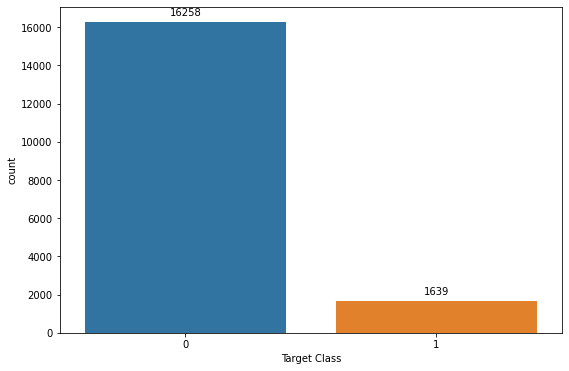

In [11]:
fig, axs = plt.subplots(figsize=(9, 6))
fg=sns.countplot(data=df,x='target_class')
fg.set_xlabel("Target Class")
for bars in axs.containers:
        axs.bar_label(bars, fmt='%1.f',padding=5)
fig.savefig('D:\\Samsung Innovation Campus\\Data\\pulsar data\\target_class.png', bbox_inches='tight', dpi=80)
plt.show()

* **Class imbalance**: (10:1 almost)
* No. of instances pulsar stars are detected in dataset is 1639
* No. of instances pulsar stars are not detected in dataset is 16258

In [12]:
# colors palettes
palett=['Accent','Blues','BrBG','BuGn','BuPu','Dark2','GnBu','Greens','Greys','OrRd','Oranges','PRGn','Paired','Pastel1',
   'Pastel2','PiYG','PuBu','PuBuGn','PuOr','PuRd','Purples','RdBu','RdGy','RdPu','RdYlBu','RdYlGn','Reds','Set1',
   'Set2','Set3','Spectral','YlGn','YlGnBu','YlOrBr','YlOrRd']

## Figure out Data

In [13]:
def create_plot(columne,data,i):
    data=data[df[columne].notnull()]
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    font_dict = {'fontsize': 14}
    title=['Before Distribution','After Distribution']
    ax = np.ravel(ax)
    if i==1:
        sns.set(style='whitegrid')
        sns.distplot(data=data,x=columne ,ax = ax[0],palette='magma').set_title(title[i])
        sns.boxplot(data=data,y=columne ,x='target_class',ax = ax[1],palette='magma').set_title(title[i])
    else:
        sns.set(style='whitegrid')
        sns.kdeplot(data=data,x=columne ,ax = ax[0],color='#2171b5',palette='cubehelix_r').set_title(title[i])
        sns.boxplot(data=data,y=columne ,x='target_class',ax = ax[1],palette='cubehelix_r').set_title(title[i])
        
    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()

In [14]:
def create_plot(columne,data,i,xlabel):
    data=data[df[columne].notnull()]
    fig, ax = plt.subplots(1,2, figsize = (13,7))
    font_dict = {'fontsize': 14}
    ax = np.ravel(ax)
    global palett
    pale=np.random.choice(palett,1)[0]
    sns.set(style='whitegrid')
    Hist=sns.kdeplot(data=data,x=columne,ax = ax[0],palette=pale,multiple="stack")
    Hist.set_title("Hisotogram of " + xlabel)
    Hist.set_xlabel(xlabel)
    
    box=sns.boxplot(data=data,y=columne ,x='target_class',ax = ax[1],palette=pale)#.set_title("boxplot of " + columne+" with Target")
    box.set_title("boxplot of " + xlabel+" with Target")
    box.set_ylabel(xlabel)
    box.set_xlabel('Target Class')
    
    
    #fig.savefig('D:\\Samsung Innovation Campus\\Data\\pulsar data\\{}.png'.format(xlabel), bbox_inches='tight', dpi=150)
    ax = np.reshape(ax, (1, 2))
    plt.tight_layout()

In [15]:
def create_scatter_plo(x,y,i,a,b):
    pal=['cubehelix_r','magma']
    data=df[(df[x].notnull()) & (df[y].notnull())]
    data['target_class'] = data['target_class'].apply(lambda x: 'Non Pulsar'  if x==0 else 'Pulsar')
    #data['target_class'] = data.target_class.astype(object)
    color_discrete=["red","green","blue", "goldenrod","magenta"]
    shuffle(color_discrete)
    fig = px.scatter(data, x=x, y =y,color="target_class",symbol="target_class",
                     labels={x:a,y:b,"target_class":"target class"},
                    color_discrete_sequence=color_discrete[:2],
                    )
    #fig.write_image("D:\Samsung Innovation Campus\Data\pulsar data\fig{}.png".format(i))
    fig.show()

### Mean of the integrated profile & Mean of the DM-SNR curve

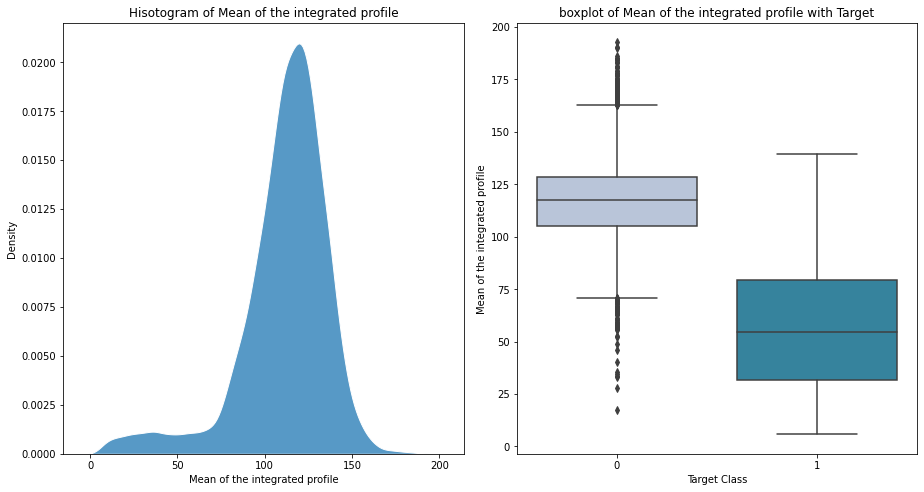

In [16]:
create_plot(columne='Mean_integrated_profile',data=df,i=0,xlabel='Mean of the integrated profile')

- left Skewed distribution amost a normal distribution except for a large left tail
- target 0 has some outliers
- target 1 Almost no outliers

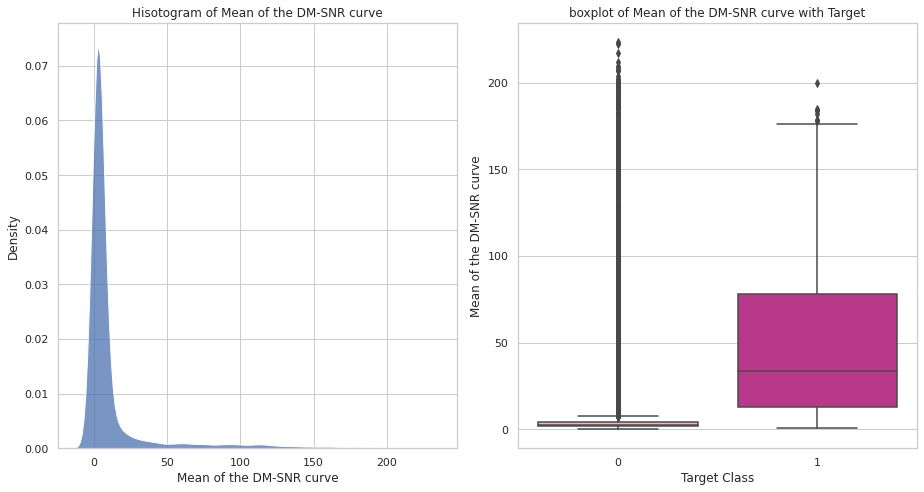

In [17]:
create_plot(columne='Mean_DM_SNR',data=df,i=0,xlabel='Mean of the DM-SNR curve')

- Highly crowded, **Right Skewed** distribution, with a fat right tail.
- target 0 has outliers
- target 1 has some outliers

In [18]:
create_scatter_plo(x='Mean_integrated_profile', y = 'Mean_DM_SNR',i=0,a='Mean of the integrated profile',b='Mean of the DM-SNR curve')

- From this figure, we can deduce the effect of the "Mean of the integrated profile" in choosing Target Class
- There is no change in the selection of the Target Class according to the  y-axis Since the single value in most of the figure can be a pulsar stars or not

### Standard deviation of the integrated profile & Standard deviation of the DM-SNR curve

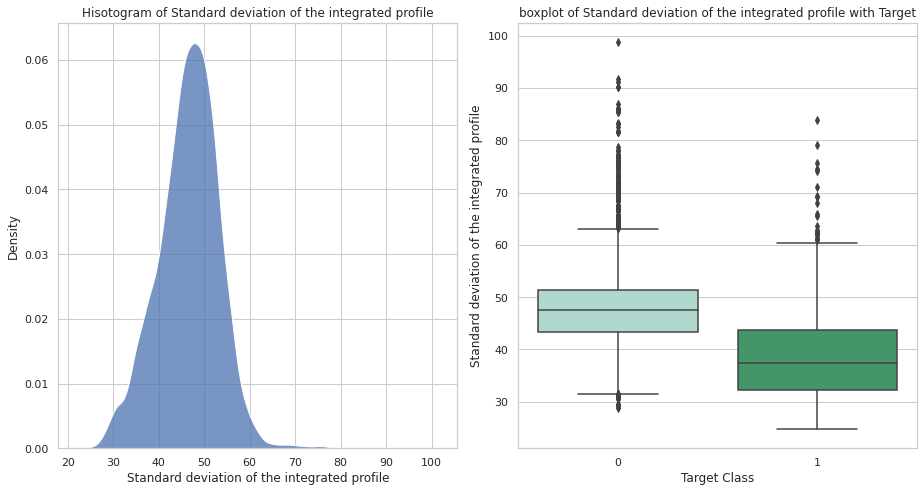

In [19]:
create_plot(columne='std_integrated_profile',data=df,i=1,xlabel='Standard deviation of the integrated profile')

- Std. Dev Almost a **normal** distribution with a tail to right of mean
- Std. Dev has some outliers

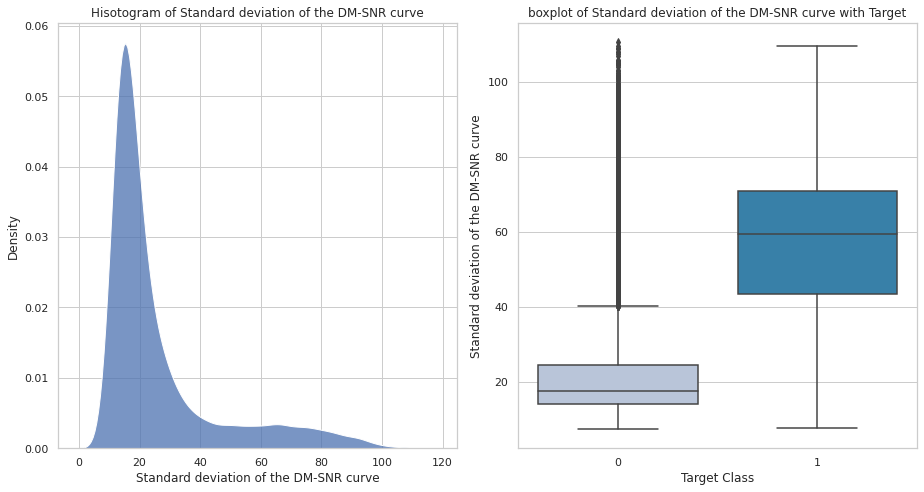

In [20]:
create_plot(columne='std_DM_SNR',data=df,i=1,xlabel='Standard deviation of the DM-SNR curve')

- **Right skewed**, with a fat right tail
- target 0 has some outliers
- target 1 Almost no outliers

In [21]:
create_scatter_plo(x='std_integrated_profile', y = 'std_DM_SNR',i=1,a='Standard deviation of the integrated profile',b='Standard deviation of the DM-SNR curve')

- The figure shows that each of the properties has a strong specific **range** and is weakly intertwined

### Excess kurtosis of the integrated profile & Excess kurtosis of the DM-SNR curve

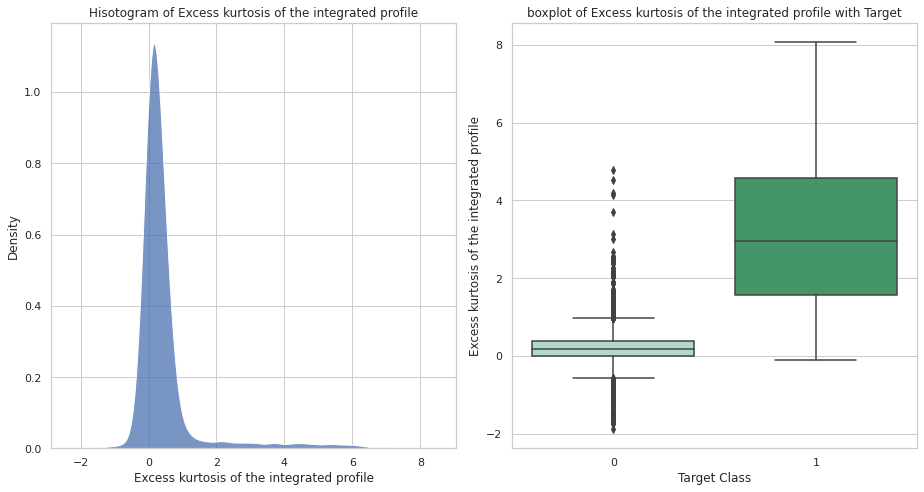

In [22]:
create_plot(columne='Excess_kurtosis_integrated_profile',data=df,i=0,xlabel='Excess kurtosis of the integrated profile')

- **Right skewed**, with few outliers in the form of a long tail to the right
- **Highly crowded**
- target **1** Almost **no** outliers

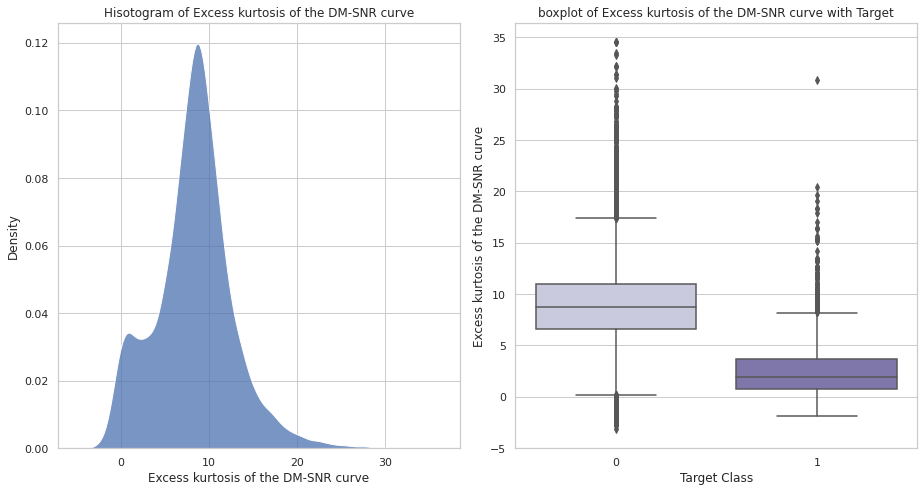

In [23]:
create_plot(columne='Excess_kurtosis_DM_SNR',data=df,i=0,xlabel='Excess kurtosis of the DM-SNR curve')

 - Left skewed  Almost **normal** distribution. Minimal tails.
 - It has some **outliers**

In [24]:
create_scatter_plo(x='Excess_kurtosis_integrated_profile', y = 'Excess_kurtosis_DM_SNR',i=0,a='Excess kurtosis of the integrated profile',b='Excess kurtosis of the DM-SNR curve')

- note that most of the small values of the **Excess kurtosis of the integrated profile** on x-axis are not pulsar stars, while the high values are a pulsar stars
- note that most of the small values of the **Excess kurtosis of the DM-SNR curve** on y-axis are pulsar stars, while the high values are a not pulsar stars

### Skewness of the integrated profile & Skewness of the DM-SNR curve

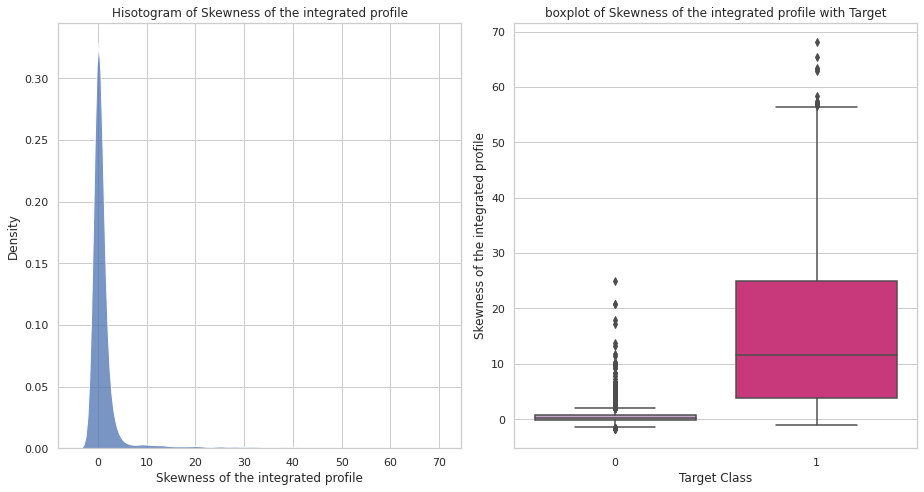

In [25]:
create_plot(columne='Skewness_integrated_profile',data=df,i=1,xlabel='Skewness of the integrated profile')

- Highly crowded, few outliers in the form of a long tail to the right
- It has some outliers, **right skewed**

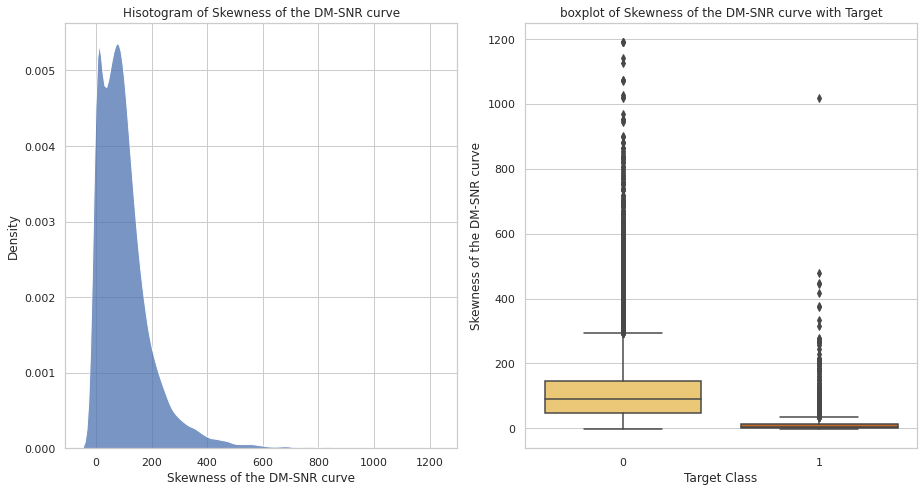

In [26]:
create_plot(columne='Skewness_DM_SNR',data=df,i=1,xlabel='Skewness of the DM-SNR curve')

- Highly right skewed with a long right tail
- It has some outliers, right skewed 

In [27]:
create_scatter_plo(x='Skewness_integrated_profile', y = 'Skewness_DM_SNR',i=1,a='Skewness of the integrated profile',b='Skewness of the DM-SNR curve')

- note that most of the small values of the **Skewness of the integrated profile** on x-axis are not pulsar stars, while the high values are a pulsar stars
- note that most of the small values of the **Skewness of the DM-SNR curve** on y-axis are pulsar stars, while the high values are a not pulsar stars

----

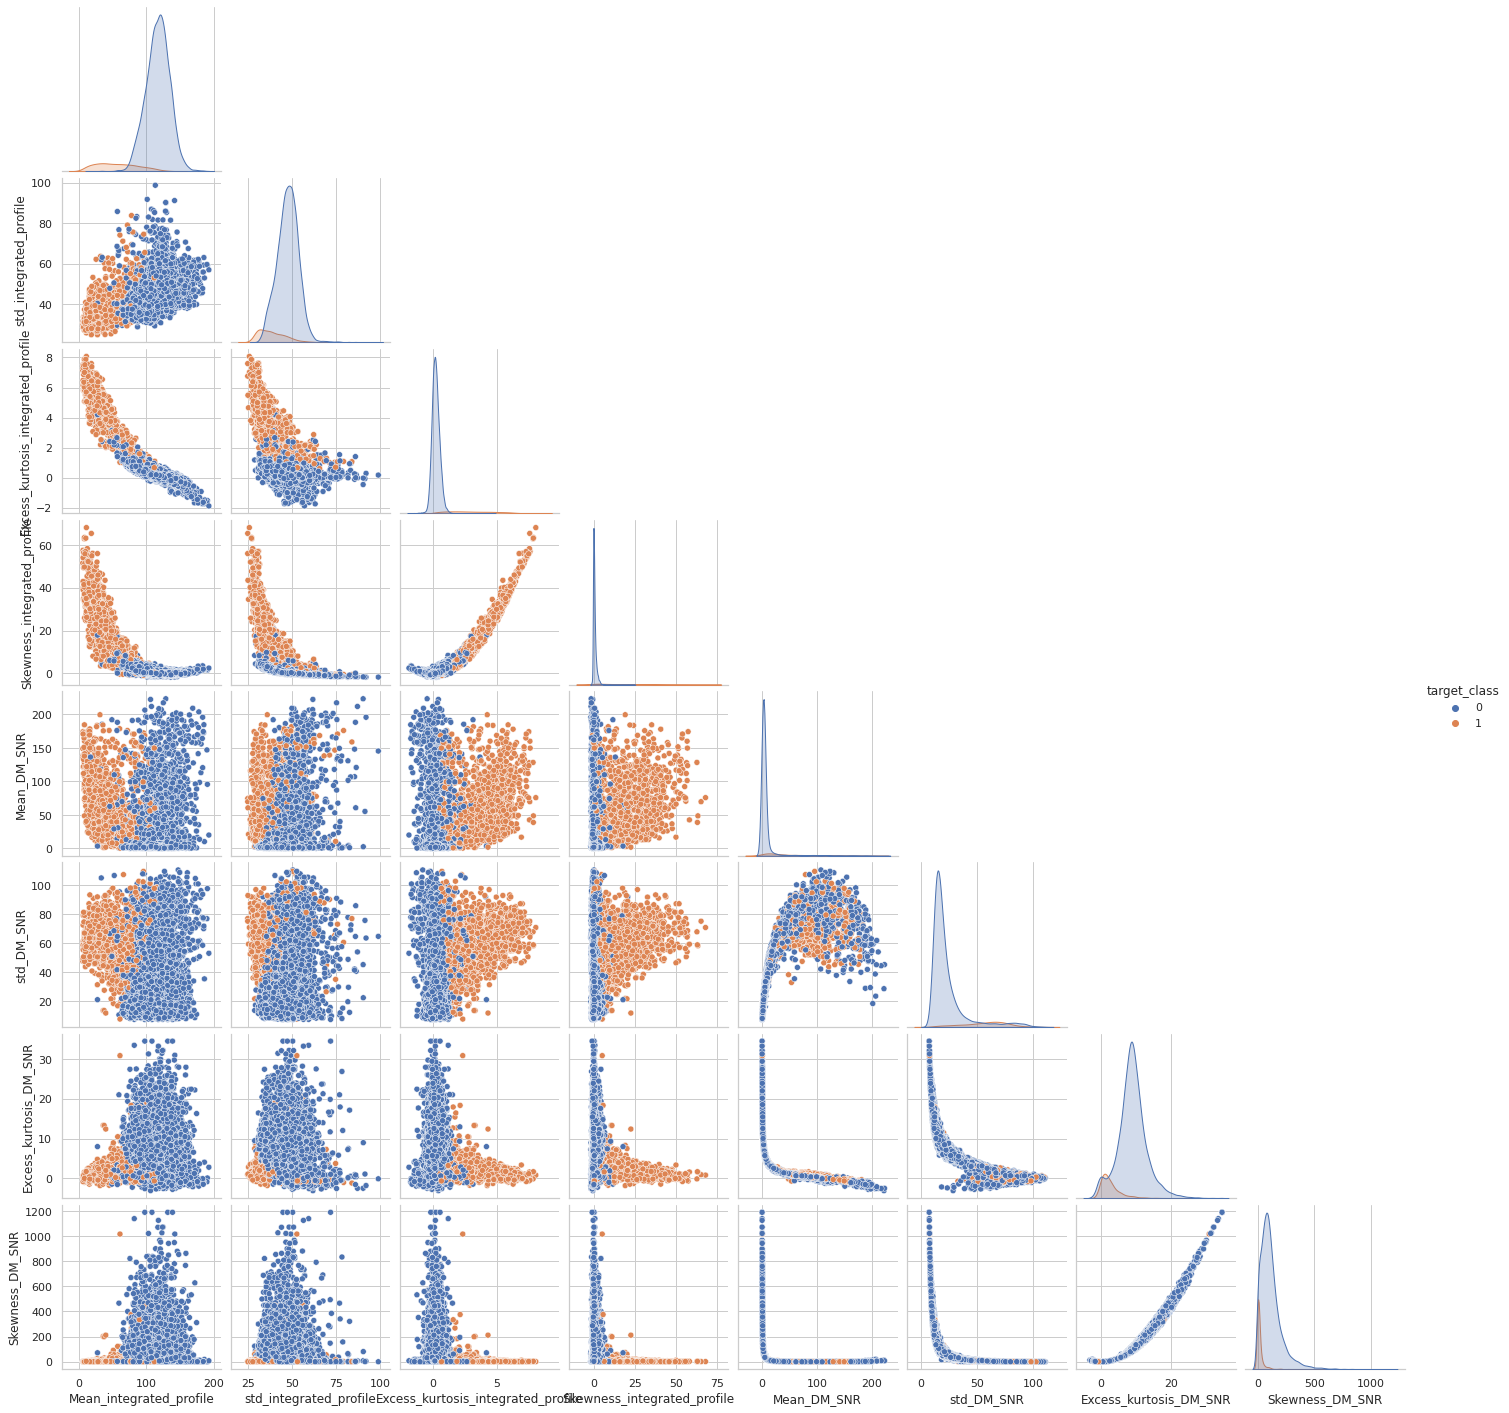

In [28]:
g = sns.pairplot(df,hue='target_class',corner=True)

### Correlation Heatmap

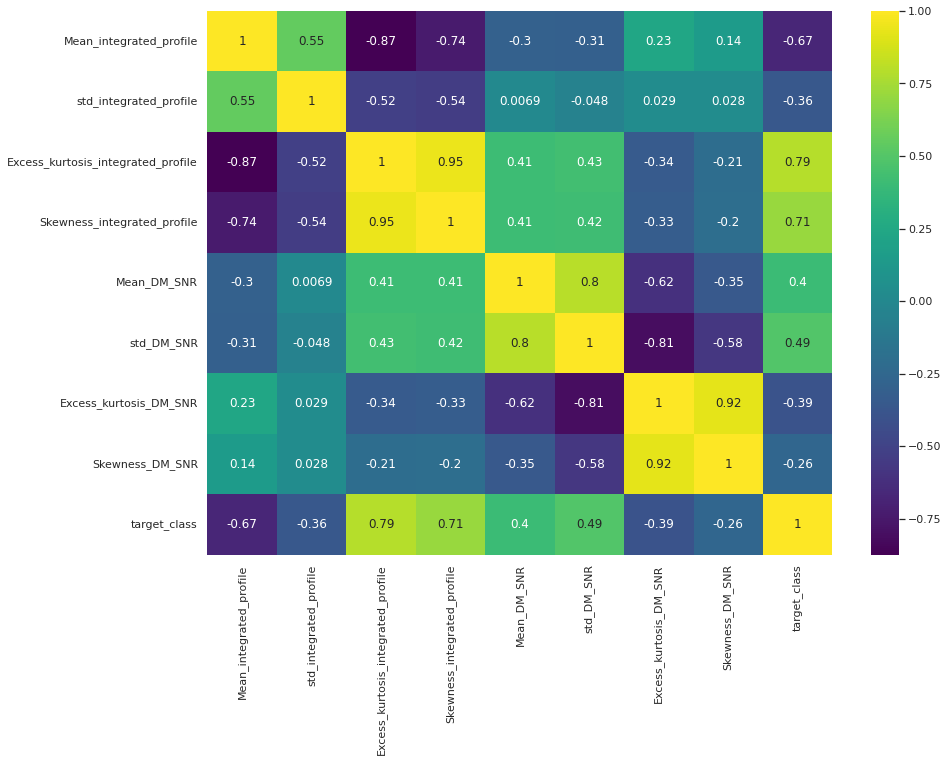

In [29]:
fig=plt.figure(figsize = (14, 10))
corr_mat = df.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns,cmap='viridis', yticklabels = corr_mat.columns, annot=True)
fig.savefig('D:\\Samsung Innovation Campus\\Data\\pulsar data\\Heatmap.png', bbox_inches='tight', dpi=100)
plt.show()

### Correlations between 2 dependent variables

**Highly positively correlated:**

1. Skewness of the integrated profile and Excess kurtosis of the integrated profile
2. Skewness of the DM-SNR curve and Excess kurtosis of the DM-SNR curve
3. Mean the DM-SNR curve and Standard Deviation of the DM-SNR curve

**Highly negatively correlated:**

1. Mean of the integrated profile and Excess kurtosis of the integrated profile
2. Mean of the integrated profile and Skewness of the integrated profile
3. Excess kurtosis the DM-SNR curve and Standard Deviation of the DM-SNR curve

### Correlations between independent and dependent variable
**Highly positively correlated:**

1. Excess kurtosis of the integrated profile
2. Skewness of the integrated profile

**Highly negatively correlated:**

1. Mean of the integrated profil

## Detect Outliers for Every columns

In [30]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

> **Since there are not many outliers we can either remove them or cap them. However, removing them is not advised, so we will cap them using IQR**

In [31]:
data_df=df.copy()
data0=df[df['target_class']==0.0]
data1=df[df['target_class']==1.0]

In [32]:
dec={"Colume":[],"outliers":[],"u_range":[] , 'l_range':[] ,"upper":[] , 'lower':[] ,
     "Nu_range":[] , 'Nl_range':[] ,"N_upper":[] , 'N_lower':[] 
    }
for column in df.iloc[:,:-1].columns:
    lr,ur=remove_outlier(data0[column])
    u_data=(data_df[(data_df['target_class']==0)&(data_df[column] > ur)])[column]
    l_data=(data_df[(data_df['target_class']==0)&(data_df[column] < lr)])[column]
    dec['Colume'].append(column + " 0")
    dec['outliers'].append(len(u_data)+len(l_data))
    dec['upper'].append(len(u_data))
    dec['lower'].append(len(l_data))
    dec['u_range'].append(ur)
    dec['l_range'].append(lr)
    
    if not u_data.empty:
        u_data=sorted(u_data)
        index=int(round(len(u_data)*0.7,0))
        ur=u_data[index]
        dec['N_upper'].append(len(u_data[index:]))
    else:
        dec['N_upper'].append(len(u_data))
        
    if not l_data.empty:
        l_data=sorted(l_data)
        index=int(round(len(l_data)*0.3,0))
        lr=l_data[index]
        dec['N_lower'].append(len(l_data[:index]))
    else:
        dec['N_lower'].append(len(l_data))
        
    index=(data_df[(data_df['target_class']==0)&((data_df[column] < lr)|(data_df[column] > ur))]).index
    index=index.to_list()
    
    dec['Nu_range'].append(ur)
    dec['Nl_range'].append(lr)
    
    data_df.drop(index,inplace=True)
    
    lr,ur=remove_outlier(data1[column])
    u_data=(data_df[(data_df['target_class']==1)&(data_df[column] > ur)])[column]
    l_data=(data_df[(data_df['target_class']==1)&(data_df[column] < lr)])[column]
    dec['Colume'].append(column + " 1")
    dec['outliers'].append(len(u_data)+len(l_data))
    dec['upper'].append(len(u_data))
    dec['lower'].append(len(l_data))
    dec['u_range'].append(ur)
    dec['l_range'].append(lr)
    
    if not u_data.empty:
        u_data=sorted(u_data)
        index=int(round(len(u_data)*0.7,0))
        ur=u_data[index]
        dec['N_upper'].append(len(u_data[index:]))
    else:
        dec['N_upper'].append(len(u_data))
        
    if not l_data.empty:
        l_data=sorted(l_data)
        index=int(round(len(l_data)*0.3,0))
        lr=l_data[index]
        dec['N_lower'].append(len(l_data[:index]))
    else:
        dec['N_lower'].append(len(l_data))
        
        
    index=(data_df[(data_df['target_class']==1)&((data_df[column] < lr)|(data_df[column] > ur))]).index
    index=index.to_list()
    
    dec['Nu_range'].append(ur)
    dec['Nl_range'].append(lr)
    
    data_df.drop(index,inplace=True)
    

In [33]:
pd.DataFrame(dec).sort_values(['N_upper','N_lower'],ascending=False)

Colume  outliers     u_range    l_range  \
8                          Mean_DM_SNR 0      1953    7.782504  -1.698265   
6          Skewness_integrated_profile 0       982    1.991510  -1.550020   
10                          std_DM_SNR 0       940   40.090606  -1.432904   
14                     Skewness_DM_SNR 0       729  293.223532 -99.817882   
12              Excess_kurtosis_DM_SNR 0       517   17.415148   0.135477   
4   Excess_kurtosis_integrated_profile 0       345    0.969288  -0.567716   
15                     Skewness_DM_SNR 1       182   34.016658 -20.775265   
2               std_integrated_profile 0       147   63.211982  31.487586   
13              Excess_kurtosis_DM_SNR 1       104    8.140270  -3.673840   
0              Mean_integrated_profile 0       142  162.825195  70.708008   
3               std_integrated_profile 1        21   60.970990  15.073091   
7          Skewness_integrated_profile 1        12   56.496396 -27.809051   
9                          Mean_DM_SNR 1         8  176.644440 -85.571279   
1              Mean_integrated_profile 1         0  150.527344 -39.472656   
5   Excess_kurtosis_integrated_profile 1         0    9.133267  -2.990299   
11                          std_DM_SNR 1         0  112.464447   1.855160   

    upper  lower    Nu_range   Nl_range  N_upper  N_lower  
8    1953      0   56.085284  -1.698265      586        0  
6     982      0    3.121111  -1.550020      295        0  
10    940      0   60.948140  -1.432904      282        0  
14    729      0  400.997616 -99.817882      219        0  
12    517      0   21.735507   0.135477      155        0  
4     235    110    1.227574  -0.970909       71       33  
15    182      0   86.846691 -20.775265       55        0  
2     130     17   74.103389  30.750983       39        5  
13    104      0   12.385193  -3.673840       31        0  
0      75     67  175.523438  58.289062       23       20  
3      21      0   71.106215  15.073091        6        0  
7      12      0   63.149537 -27.809051        4        0  
9       8      0  184.525920 -85.571279        2        0  
1       0      0  150.527344 -39.472656        0        0  
5       0      0    9.133267  -2.990299        0        0  
11      0      0  112.464447   1.855160        0        0

In [34]:
data_df.shape

(16084, 9)

In [35]:
df.shape

(17897, 9)

### Figure out outlier Before remove them and  After

In [36]:
def box_plot(column,xlabel):
    global palett
    fig, ax = plt.subplots(2,2, figsize = (12,8))
    font_dict = {'fontsize': 10}
    ax = np.ravel(ax)
    shuffle(palett)
    pale=palett[:4]
    
    sns.set(style='whitegrid')
    pl1=sns.boxplot(data=df[df['target_class']==0] ,x=column,ax = ax[0],palette=pale[0])
    pl1.set_xlabel(xlabel+" of 0 target Before")
    
    sns.set(style='whitegrid')
    pl2=sns.boxplot(data=data_df[data_df['target_class']==0] ,x=column,ax = ax[1],palette=pale[1])
    pl2.set_xlabel(xlabel+" of 0 target After")

    
    sns.set(style='whitegrid')
    pl3=sns.boxplot(data=df[df['target_class']==1] ,x=column,ax = ax[2],palette=pale[2])
    pl3.set_xlabel(xlabel+" of 1 target Before")
    
    sns.set(style='whitegrid')
    pl4=sns.boxplot(data=data_df[data_df['target_class']==1] ,x=column,ax = ax[3],palette=pale[3])
    pl4.set_xlabel(xlabel+" of 1 target After")
    
    #fig.savefig('D:\\Samsung Innovation Campus\\Data\\pulsar data\\{}.png'.format(column), bbox_inches='tight', dpi=80)
    ax = np.reshape(ax, (2, 2))
    plt.tight_layout()

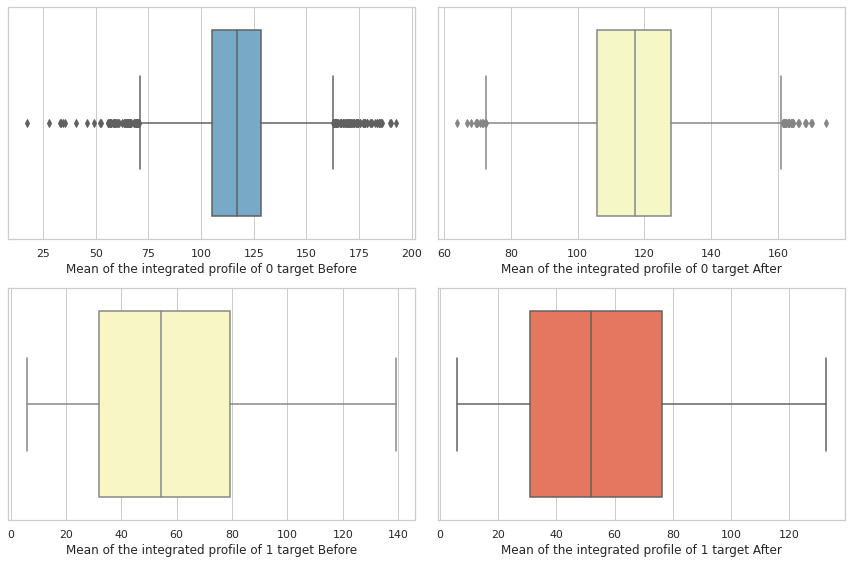

In [37]:
box_plot('Mean_integrated_profile',xlabel='Mean of the integrated profile')

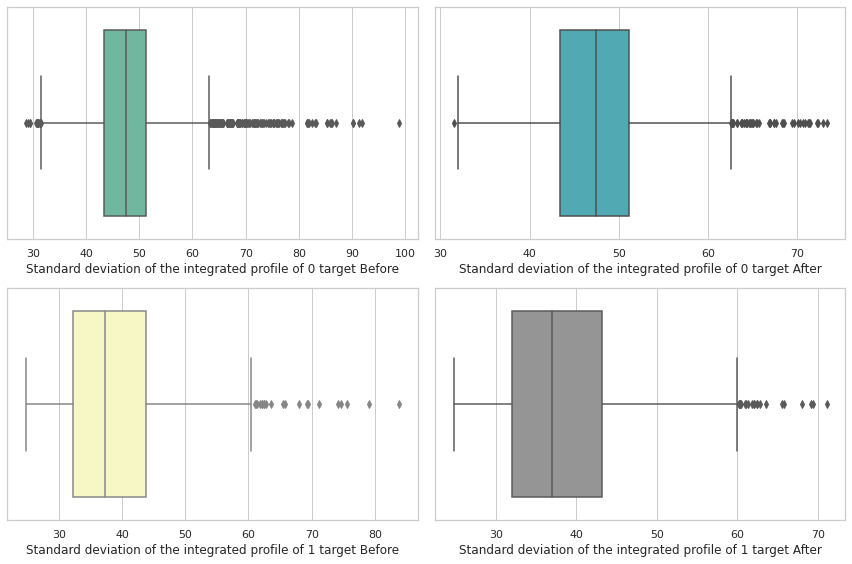

In [38]:
box_plot('std_integrated_profile',xlabel='Standard deviation of the integrated profile')

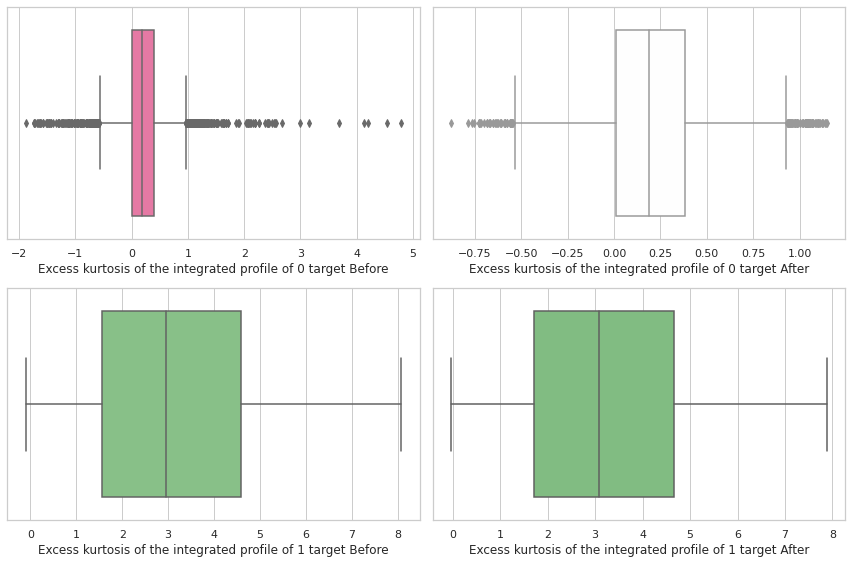

In [39]:
box_plot('Excess_kurtosis_integrated_profile',xlabel='Excess kurtosis of the integrated profile')

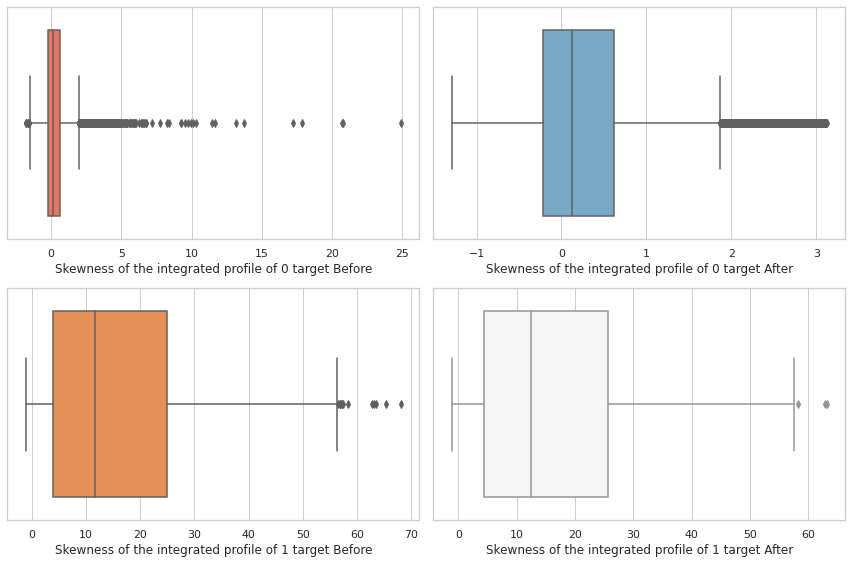

In [40]:
box_plot('Skewness_integrated_profile',xlabel='Skewness of the integrated profile')

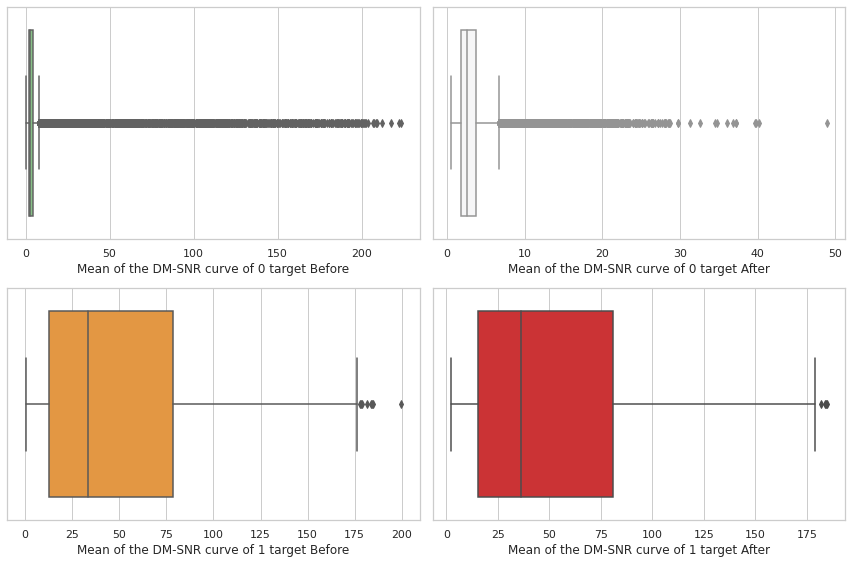

In [41]:
box_plot('Mean_DM_SNR',xlabel='Mean of the DM-SNR curve')

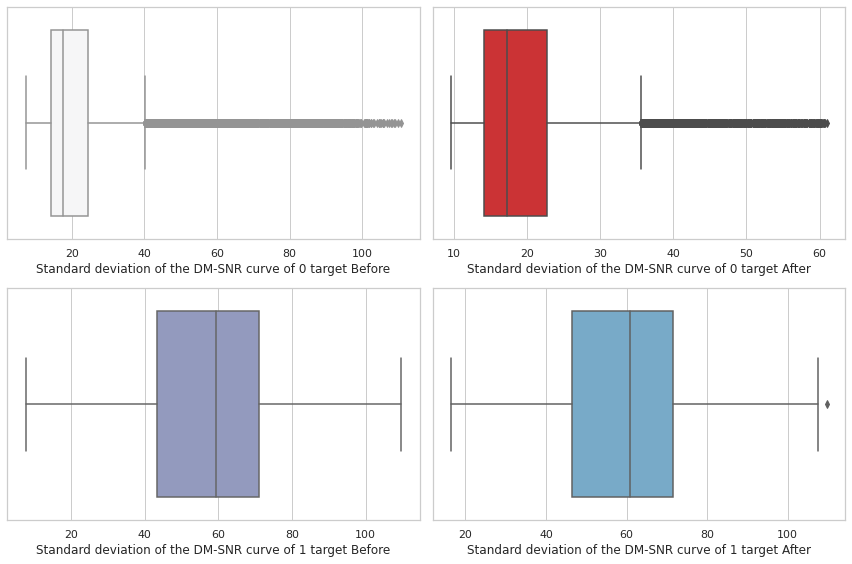

In [42]:
box_plot('std_DM_SNR',xlabel='Standard deviation of the DM-SNR curve')

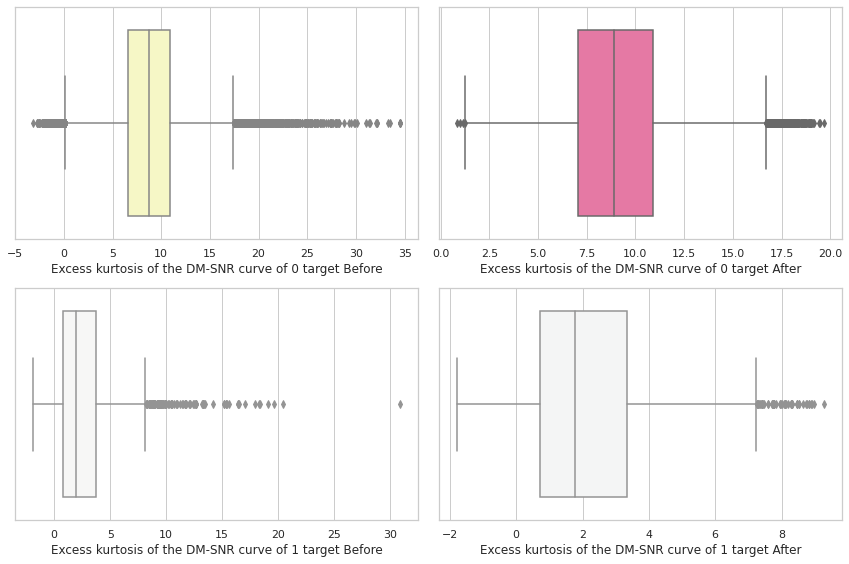

In [43]:
box_plot('Excess_kurtosis_DM_SNR',xlabel='Excess kurtosis of the DM-SNR curve')

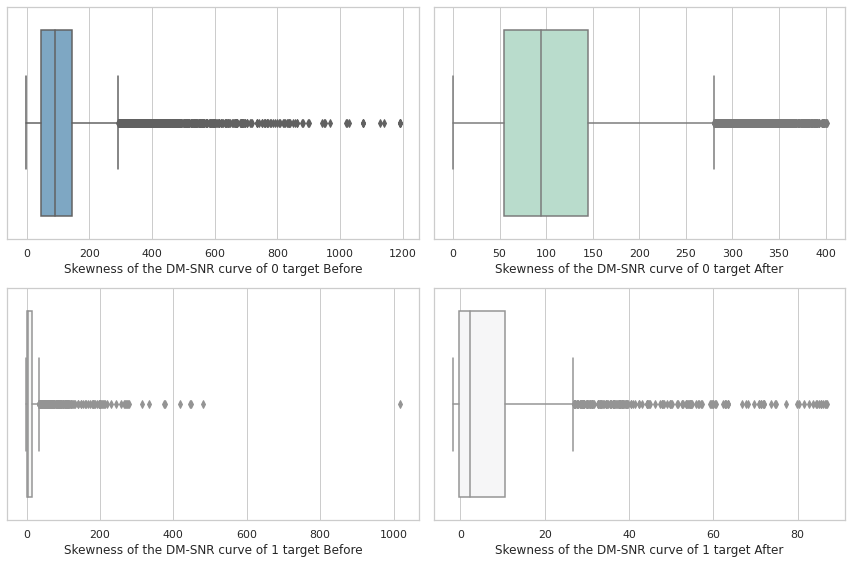

In [44]:
box_plot('Skewness_DM_SNR',xlabel='Skewness of the DM-SNR curve')

## Scaling and Split the data

### Split

In [45]:
df1=data_df[data_df['target_class']==0].sample(frac = 0.35,random_state=1234)
df2=data_df[data_df['target_class']==1]
combined = pd.concat([df1, df2])
combined=combined.sample(frac = 1,random_state=4321)
combined.reset_index(drop=True,inplace=True)
combined

Mean_integrated_profile  std_integrated_profile  \
0                  127.421875               43.658406   
1                   71.445312               36.574156   
2                  110.335938               52.691952   
3                  123.632812               51.571684   
4                  113.281250               51.516371   
...                       ...                     ...   
6629               130.226562               36.638055   
6630               100.375000               41.003430   
6631               128.367188               65.731565   
6632               107.867188               46.755576   
6633               132.648438               51.445449   

      Excess_kurtosis_integrated_profile  Skewness_integrated_profile  \
0                               0.163798                     0.197325   
1                               1.744122                     6.695119   
2                               0.444700                    -0.164824   
3                              -0.069734                    -0.343128   
4                               0.365692                    -0.056710   
...                                  ...                          ...   
6629                           -0.108417                     1.299277   
6630                            1.219327                     3.156957   
6631                            0.172012                    -0.986426   
6632                            0.348629                     0.226069   
6633                           -0.138817                     0.328523   

      Mean_DM_SNR  std_DM_SNR  Excess_kurtosis_DM_SNR  Skewness_DM_SNR  \
0        1.959030   16.001698               10.225171       121.039608   
1       13.025084   44.702222                3.485497        11.091463   
2        3.485786   18.783860                7.193759        62.919935   
3       23.397157   59.189950                2.330161         3.899053   
4        5.913880   28.185098                5.731266        35.610776   
...           ...         ...                     ...              ...   
6629    17.478261   46.029876                2.674941         6.396016   
6630     7.722408   38.929336                5.172258        25.784154   
6631     6.796823   34.074206                5.130599        25.618674   
6632     2.571906   19.062668                8.968254        87.834239   
6633     1.934783   14.852984                9.767210       114.937332   

      target_class  
0                0  
1                1  
2                0  
3                0  
4                0  
...            ...  
6629             0  
6630             1  
6631             0  
6632             0  
6633             0  

[6634 rows x 9 columns]

In [46]:
x = combined.drop('target_class',axis=1)
y = combined['target_class'].values

### Scaling
- **StandardScaler** follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 
- **MinMaxScaler** scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values. 
- By using **RobustScaler()**, we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset. 

In [47]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df,columns=list(x.columns ))

In [48]:
scaler = MinMaxScaler()
x = scaler.fit_transform(robust_df)

## balance the data

### Why we have to balance the data?
The answer is quite simple, to make our predictions more accurate.  

Because if we have imbalanced data, the model is more biased to the dominant target class and tends to predict the target as the predominant target class.

### Techniques for handling imbalanced data
For handling imbalance data we are having many other ways, In this article, we will learn about the below techniques along with the code implementation.

- Oversampling
- Undersampling

In [49]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

### Oversampling

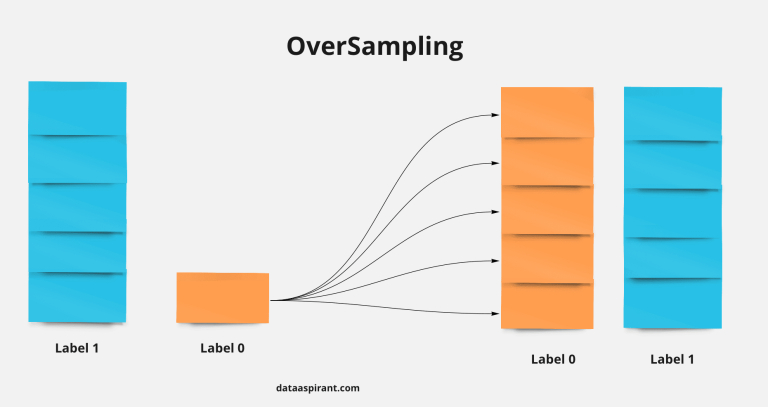

#### RandomOverSampler

In [50]:
ovs= RandomOverSampler(random_state=42)
x_res , y_res = ovs.fit_resample(x,y)
RandomOverSampler=(x_res , y_res)

In [51]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5088, 1: 1546})
Resampled dataset shape Counter({0: 5088, 1: 5088})


accuracy score 0.939731411726171
train score : 0.9394917871683279
              precision    recall  f1-score   support

  Non Pulsar       0.90      0.99      0.94      1563
      Pulsar       0.99      0.89      0.94      1490

    accuracy                           0.94      3053
   macro avg       0.94      0.94      0.94      3053
weighted avg       0.94      0.94      0.94      3053



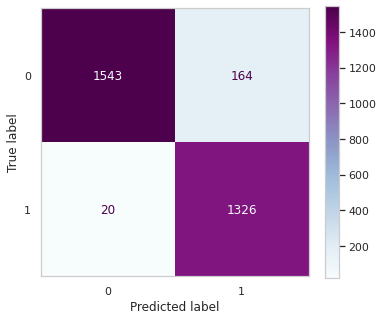

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3,random_state = 1234)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)

y_pred = model.predict(x_test)

train_score=model.score(x_train , y_train)
#test_score=model.score(x_test , y_test)

print("accuracy score",accuracy_score(y_test, y_pred))
print("train score :",train_score)
#print("test score :",test_score)

print(classification_report(y_test, y_pred,target_names=['Non Pulsar','Pulsar']))
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
cm_display.plot(ax=ax,cmap='BuPu')
plt.show()

#### SMOTETomek

In [53]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
x_res , y_res = smk.fit_resample(x,y)
SMOTETomek=(x_res , y_res)

In [54]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5088, 1: 1546})
Resampled dataset shape Counter({0: 5059, 1: 5059})


accuracy score 0.9476284584980237
train_score : 0.9370234397062976
              precision    recall  f1-score   support

  Non Pulsar       0.91      0.99      0.95      1548
      Pulsar       0.99      0.90      0.94      1488

    accuracy                           0.95      3036
   macro avg       0.95      0.95      0.95      3036
weighted avg       0.95      0.95      0.95      3036



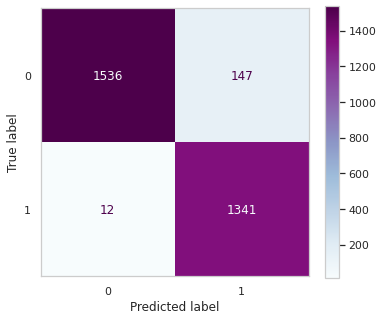

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3,random_state = 1234)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)
y_pred = model.predict(x_test)

train_score=model.score(x_train , y_train)
#test_score=model.score(x_test , y_test)

print("accuracy score",accuracy_score(y_test, y_pred))
print("train_score :",train_score)
#print("test_score :",test_score)

print(classification_report(y_test, y_pred,target_names=['Non Pulsar','Pulsar']))
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
cm_display.plot(ax=ax,cmap='BuPu')
plt.show()

---

### Oversampling pros and cons

**Pros:**
- This method doesn’t lead to information loss.
- Performs  well and gives good accuracy.
- It creates new synthetic data points with the nearest neighbours from existing data.

**Cons:**
- Increase the size of data takes high time for training.
- It may also lead to overfitting since it is replicating the minor classes.
- Need extra storage.

---

### UnderSampling

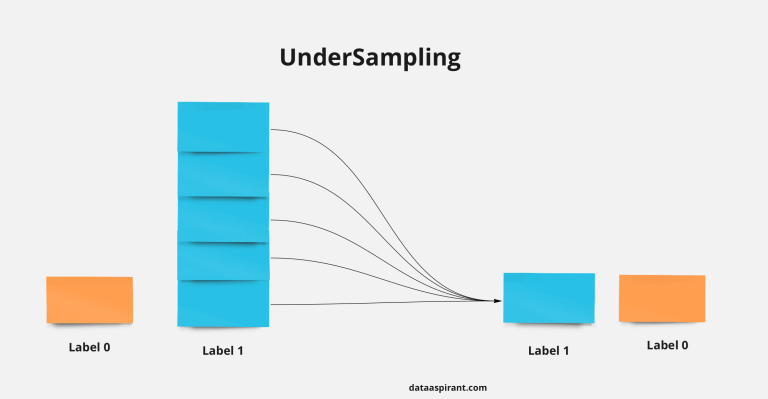

In [56]:
from imblearn.under_sampling import RandomUnderSampler

#### NearMiss  method

In [57]:
# Under sampling with nearmiss
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_res,y_res = nm.fit_resample(x,y)
NearMiss=(x_res,y_res)

In [58]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5088, 1: 1546})
Resampled dataset shape Counter({0: 1546, 1: 1546})


accuracy score 0.915948275862069
train_score : 0.9200554528650647
              precision    recall  f1-score   support

  Non Pulsar       0.86      1.00      0.92       463
      Pulsar       0.99      0.84      0.91       465

    accuracy                           0.92       928
   macro avg       0.93      0.92      0.92       928
weighted avg       0.93      0.92      0.92       928



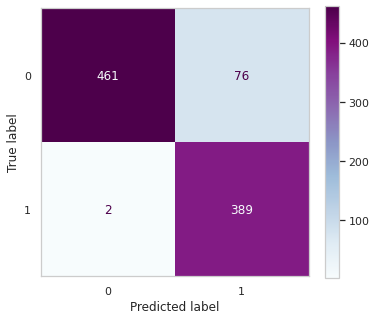

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3,random_state = 1234)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)
y_pred = model.predict(x_test)

train_score=model.score(x_train , y_train)
#test_score=model.score(x_test , y_test)

print("accuracy score",accuracy_score(y_test, y_pred))
print("train_score :",train_score)
#print("test_score :",test_score)

print(classification_report(y_test, y_pred,target_names=['Non Pulsar','Pulsar']))
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
cm_display.plot(ax=ax,cmap='BuPu')
plt.show()

#### RandomunderSampler method

In [60]:
# Under sampling with randomundersample
ous = RandomUnderSampler(random_state=42)
x_res,y_res = ous.fit_resample(x,y)
RandomunderSampler=(x_res,y_res )

In [61]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 5088, 1: 1546})
Resampled dataset shape Counter({0: 1546, 1: 1546})


accuracy score 0.9288793103448276
train_score : 0.9408502772643254
              precision    recall  f1-score   support

  Non Pulsar       0.88      0.99      0.93       463
      Pulsar       0.99      0.87      0.92       465

    accuracy                           0.93       928
   macro avg       0.94      0.93      0.93       928
weighted avg       0.94      0.93      0.93       928



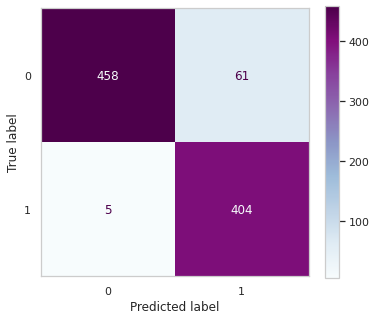

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3,random_state = 1234)
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(x_train,y_train)
y_pred = model.predict(x_test)

train_score=model.score(x_train , y_train)
#test_score=model.score(x_test , y_test)

print("accuracy score",accuracy_score(y_test, y_pred))
print("train_score :",train_score)
#print("test_score :",test_score)

print(classification_report(y_test, y_pred,target_names=['Non Pulsar','Pulsar']))
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
fig, ax = plt.subplots(figsize=(6,5))
ax.grid(False)
cm_display.plot(ax=ax,cmap='BuPu')
plt.show()

---

### Undersampling pros and cons
**Pros:**
- Reduces storage problems, easy to train
- In most cases it creates a balanced subset that carries the greatest potential for representing the larger group as a whole.
- It produces a simple random sample which is much less complicated than other techniques.

**Cons:**
- It can ignore potentially useful information which could be important for building  classifiers.
- The sample chosen by random under-sampling may be a biased sample, resulting in inaccurate results with the actual test data.
- Loss of useful information of the majority class.

### When to use oversampling VS undersampling
We have a fair amount of knowledge on these two data imbalance handling techniques, but we use them as both the methods are for handling the imbalanced data issue.

- **Oversampling:** We will use oversampling when we are having a limited amount of data.
- **Undersampling:** We will use undersampling when we have huge data and undersampling the majority call won't effect the data

----

#### so we will use Oversampling : SMOTETomek method

----

## Modeling

- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier
- KNeighborsClassifier
- XGBClassifier
- VotingClassifier ( hard , soft)

### What are the Performance Evaluation Measures for Classification Models?
- Confusion Matrix
- Precision
- Recall/ Sensitivity
- Specificity
- F1-Score
- AUC & ROC Curve

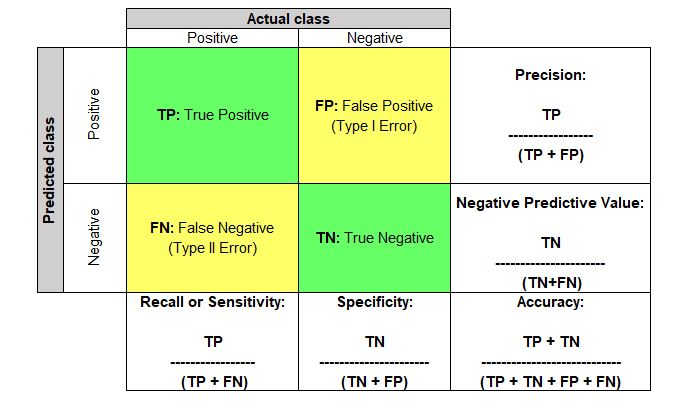

In [63]:
compa={'model':[],
       'train_score':[],
       "accuracy":[],
      'recall':[],
      'precision':[],
      'f1_score':[]}

In [64]:
def print_report(model,name,color):
    y_pred = model.predict(x_test)

    train_score=model.score(x_train , y_train)
    accuracy=accuracy_score(y_test, y_pred)
    

    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1_scor=f1_score(y_test, y_pred)
    
    print('recall  = {}'.format(np.round(recall,3)))
    print('Precision   = {}'.format(np.round(precision,3)))
    print('f1_score   = {}'.format(np.round(f1_scor,3)))

    compa['f1_score'].append(f1_scor)
    compa['accuracy'].append(accuracy)
    compa['train_score'].append(train_score)
    compa['recall'].append(recall)
    compa['precision'].append(precision)
    compa['model'].append(name) 
    
    print("accuracy score = {}".format(np.round(accuracy,3)))
    print("train score = {}".format(np.round(train_score,3)))

    print(classification_report(y_test, y_pred,target_names=['Non Pulsar','Pulsar']))
    confusion_matrix=metrics.confusion_matrix(y_pred,y_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
    fig, ax = plt.subplots(figsize=(6,5))
    ax.grid(False)
    cm_display.plot(ax=ax,cmap=color)
    plt.show()

## Logistic Regression

**Extension of linear regression that’s used for classification tasks, meaning the output variable is binary (e.g., only black or white) rather than continuous (e.g., an infinite list of potential colors)**

In [65]:
x_res,y_res=SMOTETomek
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.3,random_state = 1234)

recall  = 0.956
Precision   = 0.981
f1_score   = 0.968
accuracy score = 0.969
train score = 0.961
              precision    recall  f1-score   support

  Non Pulsar       0.96      0.98      0.97      1548
      Pulsar       0.98      0.96      0.97      1488

    accuracy                           0.97      3036
   macro avg       0.97      0.97      0.97      3036
weighted avg       0.97      0.97      0.97      3036



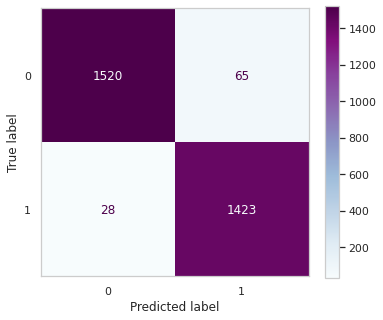

In [66]:
lr = LogisticRegression()
lr.fit(x_train , y_train)
print_report(model=lr,name="LogisticRegression",color='BuPu')

In [67]:
parameters = [{'penalty':['l1','l2']}, 
              {'C':np.logspace(-4, 4, 10)}]
grid_search = GridSearchCV(estimator = lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


best_clf_grid=grid_search.fit(x_train, y_train)  
print(best_clf_grid.best_estimator_)

LogisticRegression(C=166.81005372000558)


recall  = 0.968
Precision   = 0.978
f1_score   = 0.973
accuracy score = 0.974
train score = 0.97
              precision    recall  f1-score   support

  Non Pulsar       0.97      0.98      0.97      1548
      Pulsar       0.98      0.97      0.97      1488

    accuracy                           0.97      3036
   macro avg       0.97      0.97      0.97      3036
weighted avg       0.97      0.97      0.97      3036



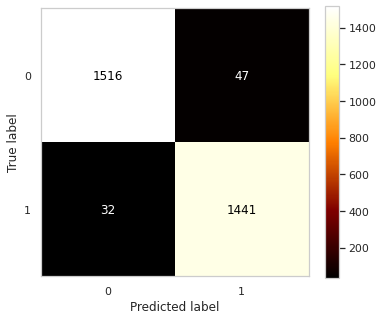

In [68]:
lr = LogisticRegression(C=166.8)
lr.fit(x_train , y_train)
print_report(model=lr,name="LogisticRegression GS",color='afmhot')

In [69]:
cv_score = cross_val_score(lr, x, y, cv=10, scoring='roc_auc')
print("=== All AUC Scores ===")
print(cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score : ", cv_score.mean())

y_score = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

=== All AUC Scores ===
[0.99776919 0.98837696 0.9906458  0.99591863 0.99129947 0.99168219
 0.99451433 0.99266451 0.9991364  0.99408179]


=== Mean AUC Score ===
Mean AUC Score :  0.9936089238953156


## Decision Tree

**Decision Tree is a tree-like graph where sorting starts from the root node to the leaf node until the target is achieved. 
It is the most popular one for decision and classification based on supervised algorithms. It is constructed by recursive partitioning where each node acts as a test case for some attributes and each edge, deriving from the node, is a possible answer in the test case. Both the root and leaf nodes are two entities of the algorithm.**

In [70]:
from sklearn.tree import DecisionTreeClassifier

recall  = 0.977
Precision   = 0.969
f1_score   = 0.973
accuracy score = 0.974
train score = 1.0
              precision    recall  f1-score   support

  Non Pulsar       0.98      0.97      0.97      1548
      Pulsar       0.97      0.98      0.97      1488

    accuracy                           0.97      3036
   macro avg       0.97      0.97      0.97      3036
weighted avg       0.97      0.97      0.97      3036



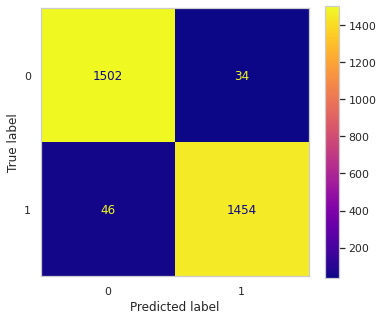

In [71]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
print_report(model=model,name="DecisionTreeClassifier",color='plasma')

In [72]:
cv_score = cross_val_score(model, x, y, cv=10, scoring='roc_auc')
print("=== All AUC Scores ===")
print(cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score : ", cv_score.mean())

y_score = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

=== All AUC Scores ===
[0.96857849 0.94599785 0.93239115 0.96731732 0.95800908 0.9521981
 0.95544485 0.95830888 0.96954534 0.95494666]


=== Mean AUC Score ===
Mean AUC Score :  0.9562737719294487


## Random Forest

**Classification or regression model that improves the accuracy of a simple decision tree by generating multiple decision trees and taking a majority vote of them to predict the output, which is a continuous variable (eg, age) for a regression problem and a discrete variable (eg, either black, white, or red) for classification.The random forest algorithm is simple to use and an effective algorithm. It can predict with high accuracy, and that’s why it is very popular.Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.**

recall  = 0.984
Precision   = 0.987
f1_score   = 0.986
accuracy score = 0.986
train score = 1.0
              precision    recall  f1-score   support

  Non Pulsar       0.98      0.99      0.99      1548
      Pulsar       0.99      0.98      0.99      1488

    accuracy                           0.99      3036
   macro avg       0.99      0.99      0.99      3036
weighted avg       0.99      0.99      0.99      3036



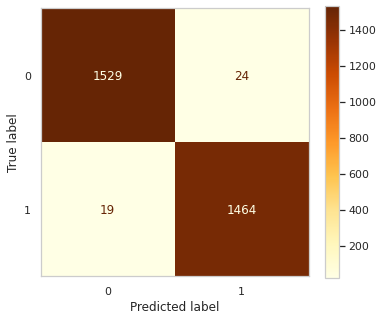

In [73]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
print_report(model=model,name="RandomForestClassifier",color='YlOrBr')

In [74]:
cv_score = cross_val_score(model, x, y, cv=10, scoring='roc_auc')
print("=== All AUC Scores ===")
print(cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score : ", cv_score.mean())

y_score = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

=== All AUC Scores ===
[0.99808606 0.98516383 0.98765448 0.99600101 0.98853112 0.98816753
 0.99187355 0.99459725 0.99743459 0.99262764]


=== Mean AUC Score ===
Mean AUC Score :  0.9920137054216649


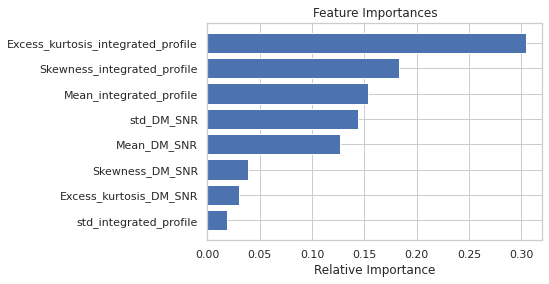

In [75]:
import pylab as pl
importances = model.feature_importances_
feature_names = df.columns.values[0:-1]
indices = np.argsort(importances)
pl.figure(1)
pl.title('Feature Importances')
pl.barh(range(len(indices)), importances[indices], color='b', align='center')
pl.yticks(range(len(indices)), feature_names[indices])
pl.xlabel('Relative Importance')
pl.show()

## KNN

**K Nearest Neighbours is a basic algorithm that stores all the available and predicts the classification of unlabelled data based on a similarity measure. In linear geometry when two parameters are plotted on the 2D Cartesian system, we identify the similarity measure by calculating the distance between the points. The same applies here, KNN algorithm works on the assumption that similar things exist in close proximity, simply we can put into the same things stay close to each other.**

recall  = 0.991
Precision   = 0.965
f1_score   = 0.978
accuracy score = 0.978
train score = 0.99
              precision    recall  f1-score   support

  Non Pulsar       0.99      0.97      0.98      1548
      Pulsar       0.96      0.99      0.98      1488

    accuracy                           0.98      3036
   macro avg       0.98      0.98      0.98      3036
weighted avg       0.98      0.98      0.98      3036



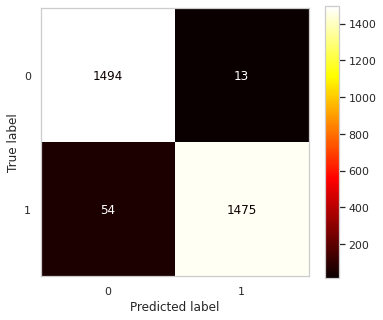

In [76]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
print_report(model=classifier,name="KNeighborsClassifier",color='hot')

In [77]:
cv_score = cross_val_score(classifier, x, y, cv=10, scoring='roc_auc')
print("=== All AUC Scores ===")
print(cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score : ", cv_score.mean())

y_score = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

=== All AUC Scores ===
[0.98594334 0.96854047 0.94745548 0.98580392 0.98090858 0.97415993
 0.96818309 0.97827418 0.98829693 0.97797816]


=== Mean AUC Score ===
Mean AUC Score :  0.9755544068206754


## XGBoost

**The XGBoost is having a tree learning algorithm as well as linear model learning, and because of that, it is able to do parallel computation on a single machine. This makes it 10 times faster than any of the existing gradient boosting algorithms. it has become the "state-of-the-art” machine learning algorithm to deal with structured data.**

recall  = 0.983
Precision   = 0.979
f1_score   = 0.981
accuracy score = 0.982
train score = 1.0
              precision    recall  f1-score   support

  Non Pulsar       0.98      0.98      0.98      1548
      Pulsar       0.98      0.98      0.98      1488

    accuracy                           0.98      3036
   macro avg       0.98      0.98      0.98      3036
weighted avg       0.98      0.98      0.98      3036



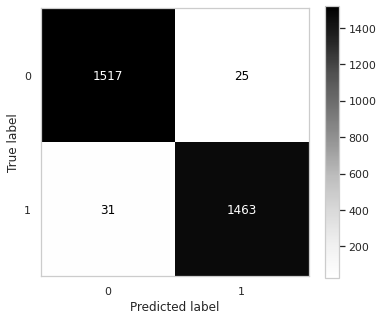

In [78]:
model = XGBClassifier(nthread=-1)
model.fit(x_train, y_train)
print_report(model=model,name="XGBClassifier",color='Greys')

In [79]:
cv_score = cross_val_score(model, x, y, cv=10, scoring='roc_auc')
print("=== All AUC Scores ===")
print(cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score : ", cv_score.mean())

y_score = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

=== All AUC Scores ===
[0.99790861 0.99136827 0.98757843 0.99647633 0.98899038 0.99390197
 0.99353201 0.99544562 0.9977775  0.99513589]


=== Mean AUC Score ===
Mean AUC Score :  0.9938115005931746


## Voting

**Voting classifiers are ensemble of many classifiers. In voting classifiers we aggregate the predictions of each classifier and predict the class that gets the most votes. This majority vote classifier is called a hard voting classifier. Voting classifiers often achieves a higher accuracy than the best classifier in the ensemble**

**Types:**
- Hard Voting 
- Soft Voting

### Hard Voting

recall  = 0.978
Precision   = 0.988
f1_score   = 0.983
accuracy score = 0.984
train score = 1.0
              precision    recall  f1-score   support

  Non Pulsar       0.98      0.99      0.98      1548
      Pulsar       0.99      0.98      0.98      1488

    accuracy                           0.98      3036
   macro avg       0.98      0.98      0.98      3036
weighted avg       0.98      0.98      0.98      3036



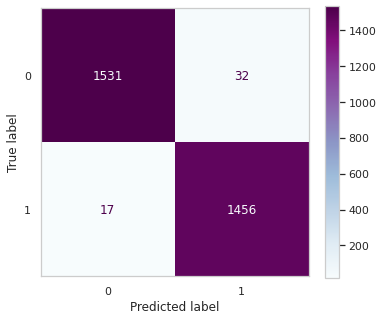

In [80]:


estimators = [('lr',LogisticRegression()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ab',AdaBoostClassifier()),
              ('xg',XGBClassifier())]
model = VotingClassifier(estimators=estimators,voting='hard')
model.fit(x_train, y_train)
print_report(model=model,name="hardVotingClassifier",color='BuPu')

### predict_proba is not available when voting='hard'

### Soft Voting

recall  = 0.979
Precision   = 0.988
f1_score   = 0.983
accuracy score = 0.984
train score = 1.0
              precision    recall  f1-score   support

  Non Pulsar       0.98      0.99      0.98      1548
      Pulsar       0.99      0.98      0.98      1488

    accuracy                           0.98      3036
   macro avg       0.98      0.98      0.98      3036
weighted avg       0.98      0.98      0.98      3036



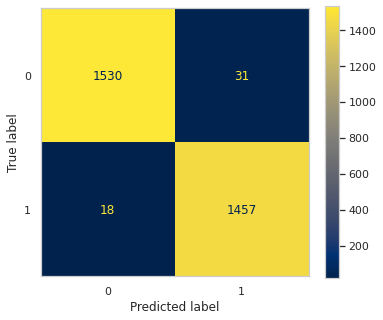

In [81]:
estimators = [('lr',LogisticRegression()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ab',AdaBoostClassifier()),
              ('xg',XGBClassifier())]
model = VotingClassifier(estimators=estimators,voting='soft')
model.fit(x_train, y_train)
print_report(model=model,name="softVotingClassifier",color='cividis')

In [82]:
cv_score = cross_val_score(model, x, y, cv=10, scoring='roc_auc')
print("=== All AUC Scores ===")
print(cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score : ", cv_score.mean())

y_score = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)

fig = px.area(
    x=fpr, y=tpr,
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

=== All AUC Scores ===
[0.99686926 0.99095    0.99056974 0.99594398 0.98878626 0.99258796
 0.99362131 0.99334065 0.9983363  0.99541529]


=== Mean AUC Score ===
Mean AUC Score :  0.9936420744190965


## compersion between models

In [83]:
compa=pd.DataFrame(compa)
compa.sort_values(['precision','accuracy','recall'],inplace=True)
compa

model  train_score  accuracy    recall  precision  \
4    KNeighborsClassifier     0.989833  0.977931  0.991263   0.964683   
2  DecisionTreeClassifier     1.000000  0.973650  0.977151   0.969333   
1   LogisticRegression GS     0.969783  0.973979  0.968414   0.978276   
5           XGBClassifier     1.000000  0.981555  0.983199   0.979250   
0      LogisticRegression     0.961028  0.969368  0.956317   0.980703   
3  RandomForestClassifier     1.000000  0.985837  0.983871   0.987188   
7    softVotingClassifier     1.000000  0.983860  0.979167   0.987797   
6    hardVotingClassifier     1.000000  0.983860  0.978495   0.988459   

   f1_score  
4  0.977793  
2  0.973226  
1  0.973320  
5  0.981221  
0  0.968357  
3  0.985527  
7  0.983463  
6  0.983452

In [84]:
# Create traces
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=compa["model"], y=compa["accuracy"],
                    mode='lines+markers',
                    name='accuracy'))
fig.add_trace(go.Scatter(x=compa["model"], y=compa["recall"],
                    mode='lines+markers',
                    name='recall'))
fig.add_trace(go.Scatter(x=compa["model"], y=compa["precision"],
                    mode='lines+markers', name='precision'))
fig.add_trace(go.Scatter(x=compa["model"], y=compa["f1_score"],
                    mode='lines+markers', name='f1_score'))
fig.add_trace(go.Scatter(x=compa["model"], y=compa["train_score"],
                    mode='lines+markers', name='train_score'))

fig.show()